# Plot results

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from ipywidgets import interact
from matplotlib import gridspec

path_data ='//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/'
path_las = '//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/well logs/'
path_wvlt = '//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/wavelets/'
fig_path = 'M:/LOCRETA_WORKPACKAGE_D/Valdemar_sprint_well_data_Mads_L/MLO documents/Figures/'
path_hrs = '//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/HRS project/Locreta_proj_Mads_localtest.prj/seismic.dir/'

In [2]:
plt.style.use('default')
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['legend.fontsize'] = 'small'
matplotlib.rcParams['axes.labelsize'] = 'medium'
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

In [3]:
path_project =  '//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/well logs/locreta_ml/'
#Importing dataframe
df = pd.read_csv(path_project+'wells_merged_new.csv')
#df_train = pd.read_csv(path_project+'training_wells.csv')
#Importing zones
zones = pd.read_excel(path_project+'Zones-wells-LOCRETA.xlsx')
zones = zones.drop(index=0)
zones['MD'] = zones['MD']*0.3048 #ft to m

In [4]:
test_logs = pd.read_csv(path_project+'wells_pred.csv')

In [5]:
#df['Zone'] = 0

In [6]:
import matplotlib.patches as mpatches 
Rødby_patch        =  mpatches.Patch(color='#A384D8', label='Rødby')
Albian_Shale_patch =  mpatches.Patch(color='#A52A2A', label='Albian Shale')
USola2_patch       =  mpatches.Patch(color='#EBA8B3', label='U.Sola-2')
USola1_patch       =  mpatches.Patch(color='#C58D96', label='U.Sola-1')
Fischschifer_path  =  mpatches.Patch(color='#000000', label='Fischschiefer')
MSola3_patch       =  mpatches.Patch(color='#00F400', label='M.Sola-3')
MSola2_patch       =  mpatches.Patch(color='#00D400', label='M.Sola-2')
MSola1_patch       =  mpatches.Patch(color='#00A100', label='M.Sola-1')
LSola1_patch       =  mpatches.Patch(color='#009000', label='L.Sola-1')
UTuxen1_patch      =  mpatches.Patch(color='gold', label='U.Tuxen-1')
MTuxen2_patch      =  mpatches.Patch(color='#D4D4D4', label='M.Tuxen-2')
MTuxen1_patch      =  mpatches.Patch(color='#9E9E9E', label='M.Tuxen-1')
MunkMarl_patch     =  mpatches.Patch(color='#85774B', label='Munk Marl')
LTuxen3_patch      =  mpatches.Patch(color='#00B3EF', label='L.Tuxen-3')
LTuxen2_patch      =  mpatches.Patch(color='#00A2D8', label='L.Tuxen-2')
LTuxen1_patch      =  mpatches.Patch(color='#0087B4', label='L.Tuxen-1')
#Valhall_patch      =  mpatches.Patch(color='#004875', label='Valhall')  

patches = [Rødby_patch,Albian_Shale_patch ,USola2_patch ,USola1_patch ,
Fischschifer_path ,MSola3_patch ,MSola2_patch ,MSola1_patch ,
LSola1_patch ,UTuxen1_patch ,MTuxen2_patch ,MTuxen1_patch ,MunkMarl_patch ,
LTuxen3_patch ,LTuxen2_patch ,LTuxen1_patch ] #,Valhall_patch

facies_labels = ['Rødby', 'Albian Shale', 'U.Sola-2', 'U.Sola-1', 
                 'Fischschiefer', 'M.Sola-3', 'M.Sola-2', 'M.Sola-1',
                 'L.Sola-1', 'U.Tuxen-1', 'M.Tuxen-2', 'M.Tuxen-1', 
                 'Munk Marl', 'L.Tuxen-3', 'L.Tuxen-2', 'L.Tuxen-1' ]#,'Valhall'

facies_colors = ['#A384D8', '#A52A2A', '#EBA8B3', '#C58D96', '#000000', 
                 '#00F400', '#00D400', '#00A100', '#009000', 'gold', 
                 '#D4D4D4', '#9E9E9E', '#85774B', '#00B3EF', '#00A2D8', 
                 '#0087B4'] #, '#004875'

facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]
    
import matplotlib.colors as colors
cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')

In [7]:
df

,UWI,DEPTH,GRN,Vp,Vs,RHOB,CALI,CNC,BIT,Formation,Zone_encoded,ILM_log10
0,BO-2X,2355.0372,2.57677,3.857078,2.028566,2.46854,8.7640,20.532,8.5,Rødby,0,0.609682
1,BO-2X,2355.1896,7.17105,3.747464,1.963796,2.46004,8.7870,21.391,8.5,Rødby,0,0.588876
2,BO-2X,2355.3420,12.06749,3.634318,1.896416,2.44804,8.8270,22.345,8.5,Rødby,0,0.561447
3,BO-2X,2355.4944,17.33202,3.526553,1.829911,2.43479,8.8320,23.320,8.5,Rødby,0,0.529027
4,BO-2X,2355.6468,22.95544,3.421846,1.765272,2.42301,8.8180,24.274,8.5,Rødby,0,0.493480
...,...,...,...,...,...,...,...,...,...,...,...,...
5129,VALDEMAR-2H,3359.3532,42.09327,2.842439,1.448258,2.32068,9.4766,33.668,8.5,L.Tuxen-1,15,0.632328
5130,VALDEMAR-2H,3364.8396,40.90633,2.952384,1.448430,2.38409,9.4766,32.206,8.5,L.Tuxen-1,15,0.659406
5131,VALDEMAR-2H,3370.3260,37.07852,2.720559,1.446433,2.16285,9.4766,35.153,8.5,L.Tuxen-1,15,0.653828
5132,VALDEMAR-2H,3375.8124,33.88726,3.099774,1.438454,2.16722,9.7500,35.888,8.5,L.Tuxen-1,15,0.585335


In [8]:
df.groupby('UWI').CNC.count()

UWI
BO-2X           483
BO-3X           937
BOJE-2C         828
JUDE-1         1004
SIAH_NE-01X     766
VALDEMAR-2H    1116
Name: CNC, dtype: int64

In [9]:
5134 * (0.2765874561745228) 

1420.0

In [10]:
well_list = df.UWI.unique()

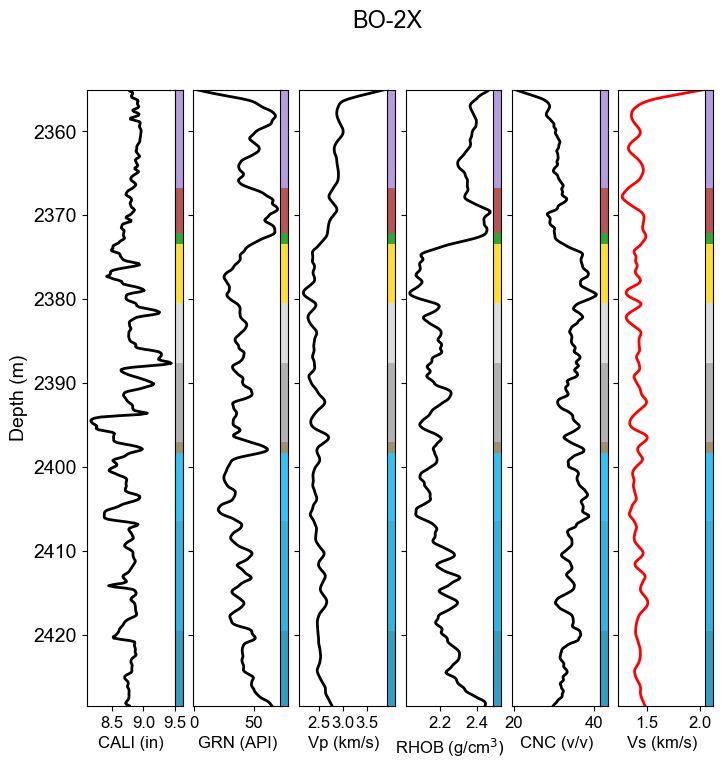

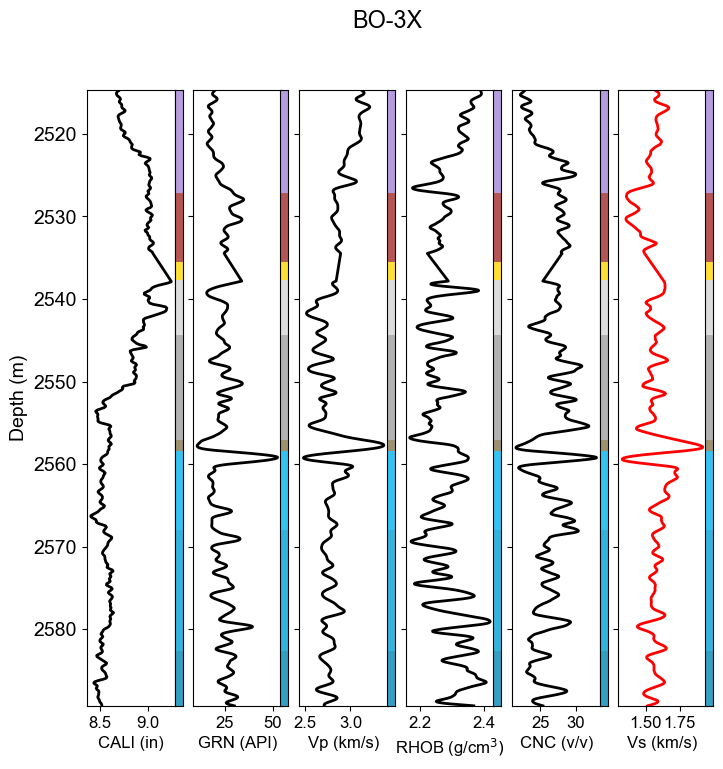

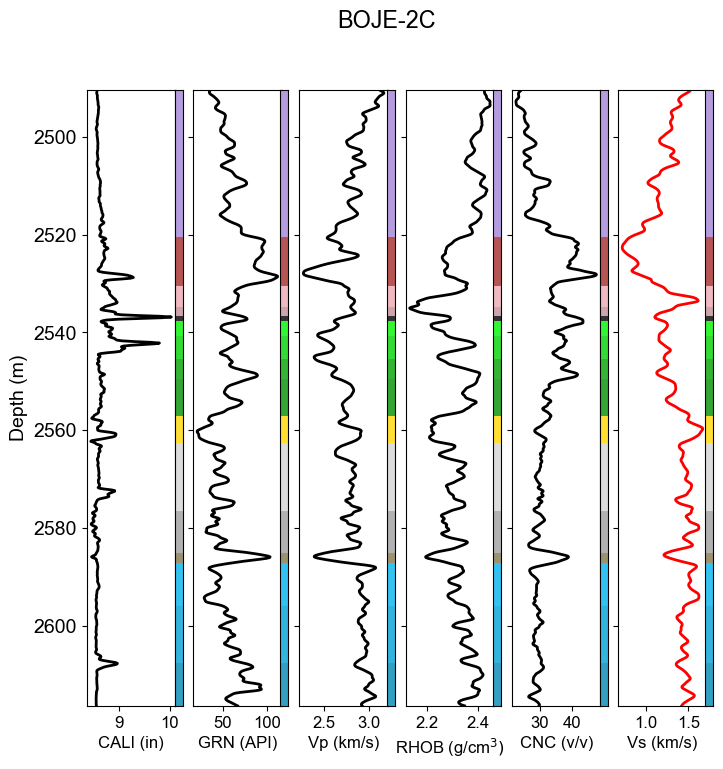

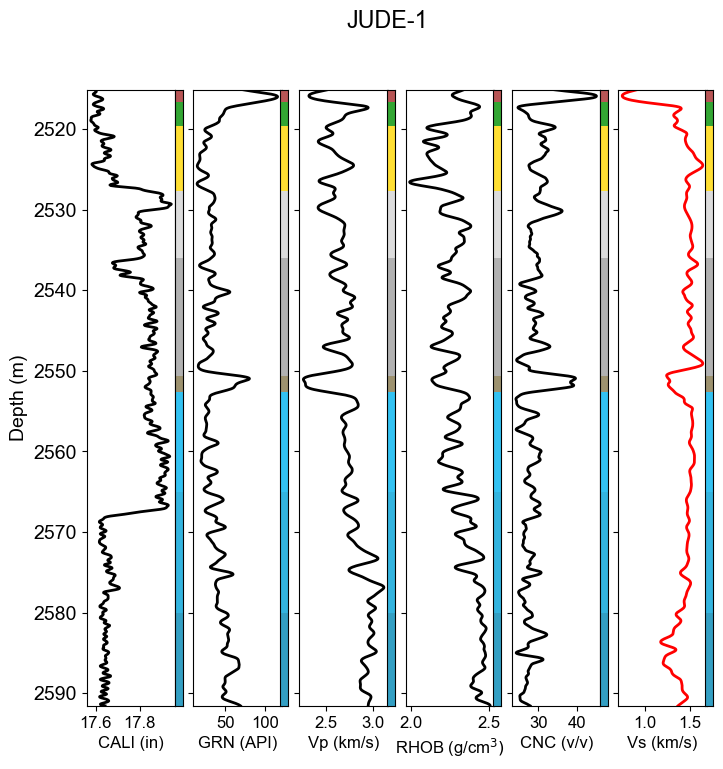

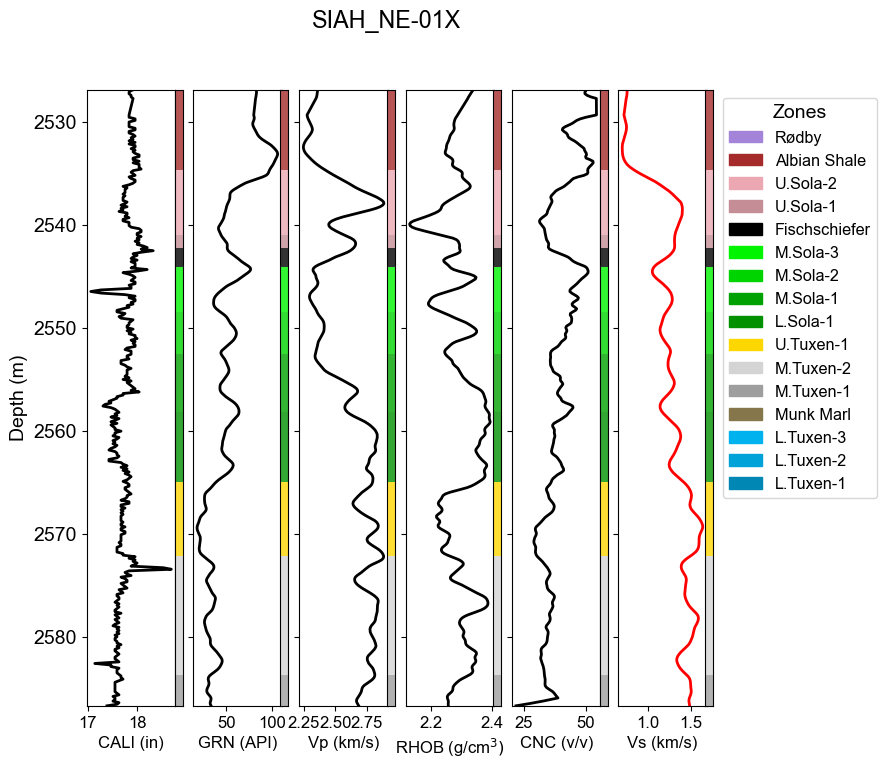

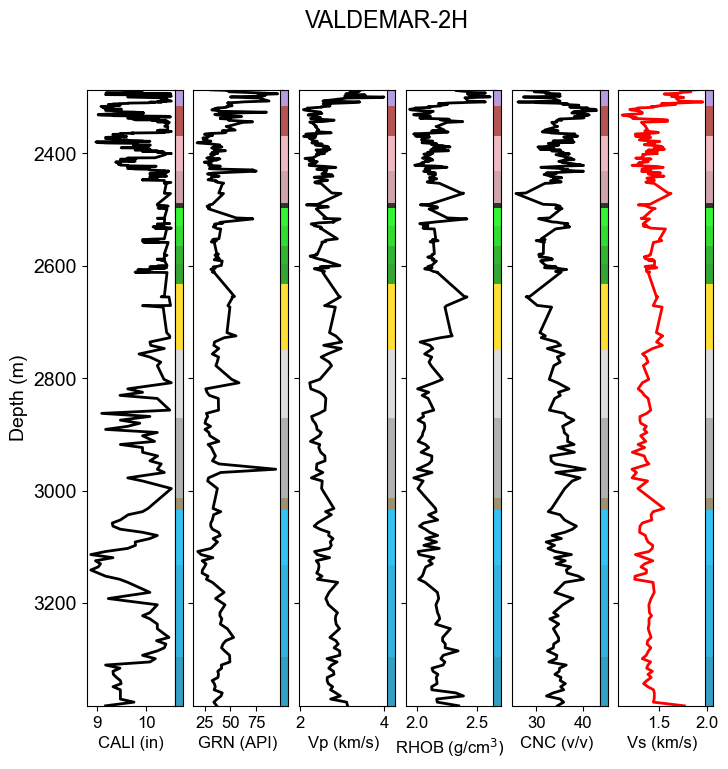

In [12]:
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=14)
#plt.locator_params(axis='x', nbins=10)

for UWI in well_list:
    features =  ['CALI','GRN','Vp', 'RHOB', 'CNC']

    target = 'Vs'
    y_list = [' (in)', ' (API)', ' (km/s)', r' (g/cm$^3)$',' (v/v)', ' (km/s)']

    fig, axs = plt.subplots(ncols=len(features)+1, sharey=True, figsize=(8,8))

    k=0
    for ax, feature in zip(axs, features):
        ax.plot(df.loc[df.UWI==UWI, feature], df.loc[df.UWI==UWI, 'DEPTH'], color='k',lw=2)
        #ax.set_title(feature)
        ax.set_xlabel(feature + str( y_list[k]), fontsize=12)
        if feature == 'DTC':
            ax.set_xlim([2,3.5])
            #ax.set_xticks(np.round(np.arange(min(df.loc[df.UWI==UWI, feature]), max(df.loc[df.UWI==UWI, feature])+1, 1.5),2))
        k+=1
    axs[0].set_ylim([df.loc[df.UWI==UWI, 'DEPTH'].min(),df.loc[df.UWI==UWI, 'DEPTH'].max()])
    axs[0].set_ylabel('Depth (m)')
    axs[-1].plot(df.loc[df.UWI==UWI, target], df.loc[df.UWI==UWI, 'DEPTH'], color='red',lw=2)
    axs[-1].set_xlabel(target + str( y_list[k]), fontsize=12)
    axs[-1].invert_yaxis()
    plt.suptitle(UWI)

    ax0 = fig.add_axes([0.235,0.1102,0.01,         0.77])
    ax1 = fig.add_axes([0.367,0.1102,0.01,         0.77])
    ax2 = fig.add_axes([0.5,0.1102,0.01,           0.77])
    ax3 = fig.add_axes([0.502 + 0.131, 0.1102,0.01,0.77])
    ax4 = fig.add_axes([0.502 + 0.264, 0.1102,0.01,0.77])
    ax5 = fig.add_axes([0.502 + 0.396, 0.1102,0.01,0.77])
    
    ax_ = [ax0,ax1, ax2, ax3, ax4, ax5]



    for i in range(len(ax_)):
        ax = ax_[i]
        cluster=np.repeat(np.expand_dims(df.loc[df['UWI'] == UWI]['Zone_encoded'].values,1), 100, 1)
        ax.imshow(cluster, interpolation='none', aspect='auto', cmap=cmap_facies,vmin=0,vmax=16, alpha=0.8)
        ax.set_xticklabels([]);
        ax.set_yticklabels([]);
        ax.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)
    if UWI == 'SIAH_NE-01X':    
        ax5.legend(handles=patches, title='Zones', bbox_to_anchor=(1.2, 1), loc='upper left',)
#    plt.savefig(fig_path+'{}_LC.png'.format(UWI),format='png', bbox_inches='tight', dpi=150)#

In [13]:
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

## Table with pre-processed values

In [17]:
df

,UWI,DEPTH,GRN,Vp,Vs,RHOB,CALI,CNC,BIT,Formation,Zone_encoded,ILM_log10
0,BO-2X,2355.0372,2.57677,3.857078,2.028566,2.46854,8.7640,20.532,8.5,Rødby,0,0.609682
1,BO-2X,2355.1896,7.17105,3.747464,1.963796,2.46004,8.7870,21.391,8.5,Rødby,0,0.588876
2,BO-2X,2355.3420,12.06749,3.634318,1.896416,2.44804,8.8270,22.345,8.5,Rødby,0,0.561447
3,BO-2X,2355.4944,17.33202,3.526553,1.829911,2.43479,8.8320,23.320,8.5,Rødby,0,0.529027
4,BO-2X,2355.6468,22.95544,3.421846,1.765272,2.42301,8.8180,24.274,8.5,Rødby,0,0.493480
...,...,...,...,...,...,...,...,...,...,...,...,...
5129,VALDEMAR-2H,3359.3532,42.09327,2.842439,1.448258,2.32068,9.4766,33.668,8.5,L.Tuxen-1,15,0.632328
5130,VALDEMAR-2H,3364.8396,40.90633,2.952384,1.448430,2.38409,9.4766,32.206,8.5,L.Tuxen-1,15,0.659406
5131,VALDEMAR-2H,3370.3260,37.07852,2.720559,1.446433,2.16285,9.4766,35.153,8.5,L.Tuxen-1,15,0.653828
5132,VALDEMAR-2H,3375.8124,33.88726,3.099774,1.438454,2.16722,9.7500,35.888,8.5,L.Tuxen-1,15,0.585335


In [19]:
table = df[['DEPTH','CALI','GRN','Vp', 'RHOB', 'CNC','ILM_log10','Vs']].describe()

In [20]:
table = np.round(table,2)

In [21]:
table

,DEPTH,CALI,GRN,Vp,RHOB,CNC,ILM_log10,Vs
count,5134.00,5134.00,5134.00,5134.00,5134.00,5134.00,5134.00,5134.00
mean,2517.32,12.08,41.25,2.68,2.26,32.09,0.39,1.41
std,113.92,4.15,18.24,0.24,0.11,5.53,0.33,0.18
min,2286.76,8.17,2.58,2.07,1.94,20.53,-0.52,0.70
25%,2443.16,8.69,27.83,2.50,2.19,27.90,0.14,1.34
50%,2541.27,9.62,36.80,2.70,2.27,31.20,0.36,1.44
75%,2568.70,17.64,50.63,2.83,2.34,35.55,0.65,1.52
max,3382.37,18.68,115.31,3.99,2.60,54.19,1.54,2.03


In [23]:
#table.to_excel(fig_path + 'test.xlsx')

## Nested CV plot

In [ ]:
nestedcv = pd.read_csv(path_project+'nested_cv.csv')

In [ ]:
nestedcv

# BO-2X IF PLOTS

In [24]:
bo2x = pd.read_csv(path_project+'bo2x_petro.csv')
bo2x.dropna(axis=0, inplace = True)
tux_idx = bo2x.loc[(bo2x['Formation'] == 'U.Tuxen-1')].index[0]

In [25]:
bo2x.columns.to_list()

['UWI',
 'DEPTH',
 'GRN',
 'DTC',
 'DTS',
 'DENS',
 'CALI',
 'NEUT',
 'BIT',
 'SWT',
 'VSHALE',
 'PHIE',
 'Formation',
 'Zone_encoded',
 'RMED_log10']

In [26]:
bo2x.rename(columns={"DTC": "Vp", "DTS": "Vs","DENS":"RHOB","NEUT":"CNC","RMED_log10":"ILM_log10"}, inplace=True)

In [27]:
bo2x.columns.to_list()

['UWI',
 'DEPTH',
 'GRN',
 'Vp',
 'Vs',
 'RHOB',
 'CALI',
 'CNC',
 'BIT',
 'SWT',
 'VSHALE',
 'PHIE',
 'Formation',
 'Zone_encoded',
 'ILM_log10']

In [28]:
def IF(Mspec,data):
    
    Por = data['PHIE'].values
    S_w = data['SWT'].values
    
    Vtot_sh = Mspec['Vsh_L'] + Mspec['Vsh_s'] 
    Vtot_r = Mspec['Vch_L'] + Mspec['Vqz_L'] + Mspec['Vch_s'] + Mspec['Vqz_s']
    
    # Normalizing the solid volume fractions according to the shale log
    c_l = (1-data['VSHALE'].values) * Mspec['Vch_L']/Vtot_r
    c_s = (1-data['VSHALE'].values) * Mspec['Vch_s']/Vtot_r
    q_l = (1-data['VSHALE'].values) * Mspec['Vqz_L']/Vtot_r
    q_s = (1-data['VSHALE'].values) * Mspec['Vqz_s']/Vtot_r
    k_l = data['VSHALE'].values * Mspec['Vsh_L']/Vtot_sh
    k_s = data['VSHALE'].values * Mspec['Vsh_s']/Vtot_sh
    
    # Define constituent properties
    Rho_ca = Mspec['chalk'][0];K_ca = Mspec['chalk'][1];G_ca = Mspec['chalk'][2]
    Rho_q = Mspec['quartz'][0];K_q = Mspec['quartz'][1];G_q = Mspec['quartz'][2]
    Rho_k = Mspec['shale'][0];K_k = Mspec['shale'][1];G_k = Mspec['shale'][2]
    Rho_w = Mspec['water'][0];K_w = Mspec['water'][1]
    Rho_o = Mspec['oil'][0];K_o = Mspec['oil'][1]
    
    Por_c = Mspec['PorC']
    
    IFc = Mspec['IFc']
    IFq = Mspec['IFq']
    IFs = Mspec['IFs']
    
    # Pre-allocate output
    model = {
        'K_sus':np.nan*np.ones((Por.size,Mspec['IFc'].size)),
        'K':np.nan*np.ones((Por.size,Mspec['IFc'].size)),
        'G':np.nan*np.ones((Por.size,Mspec['IFc'].size)),
        'M':np.nan*np.ones((Por.size,Mspec['IFc'].size)),
        'Vp':np.nan*np.ones((Por.size,Mspec['IFc'].size)),
        'Vs':np.nan*np.ones((Por.size,Mspec['IFc'].size)),
        'AI':np.nan*np.ones((Por.size,Mspec['IFc'].size)),
        'PS':np.nan*np.ones((Por.size,Mspec['IFc'].size)),
        'RHO':np.nan*np.ones((Por.size))
    }
    
    K_f = S_w/K_w + (1-S_w)/K_o # Reuss fluid mixing
    
    model['Density'] =  Por*((Rho_w*S_w) + (Rho_o*(1-S_w))) + ((1-Por)*((c_s+c_l)*Rho_ca + Rho_k*(k_s+k_l) + Rho_q*(q_s+q_l)))

    for n in range(len(IFc)):

        model['K_sus'][:,n] = ( Por/Por_c*K_f + (1-Por/Por_c)*( (c_s*(1-IFc[n])/K_ca) + (q_s*(1-IFq)/K_q) + (k_s*(1-IFs)/K_k) ) )**(-1) * (Por/Por_c + (1-Por/Por_c)*( c_s*(1-IFc[n]) + q_s*(1-IFq) + k_s*(1-IFs)) )

        model['K'][:,n] = ( ((Por/Por_c)/(model['K_sus'][:,n] + (4/3)*G_ca)) + (1-(Por/Por_c))* ( (((1-IFc[n])*c_s + (1-IFq)*q_s + (1-IFs)*k_s)/(model['K_sus'][:,n] + (4/3)*G_ca)) + ((IFc[n]*c_s+c_l) / (K_ca + (4/3)*G_ca)) + ( (IFq*q_s+q_l) / (K_q + (4/3)*G_ca)) + ((IFs*k_s+k_l) / (K_k + (4/3)*G_ca)) ))**(-1) - (4/3)*G_ca

        zeta = (G_ca/6) * ((9*K_ca + 8*G_ca)/(K_ca + 2*G_ca));

        model['G'][:,n] = ( ((Por/Por_c)/zeta) +  (1-(Por/Por_c))*( (((1-IFc[n])*c_s + (1-IFq)*q_s + (1-IFs)*k_s)/(zeta)) + ((IFc[n]*c_s+c_l)/(G_ca + zeta)) + ((IFq*q_s+q_l)/(G_q + zeta)) + ( (IFs*k_s+k_l) / (G_k + zeta))) )**(-1) - zeta

        model['M'][:,n] = model['K'][:,n] + (4/3)*model['G'][:,n]

        model['Vp'][:,n] = np.sqrt((model['K'][:,n] + (4/3)*model['G'][:,n]) / model['Density'])
        model['Vs'][:,n] = np.sqrt(model['G'][:,n] / model['Density'])

        model['AI'][:,n] = model['Vp'][:,n] * model['Density']
        model['PS'][:,n] = model['Vp'][:,n] / model['Vs'][:,n]
        

    return model

#Mspec = {
#    'chalk':[2.71,71,30],'quartz':[2.65,37.3,44.8],'shale':[2.7,15,7], # Solid properties
#    'water':[1.03,2.3],'oil':[0.8,0.62], # Fluid properties
#    'Vch_L':0.1,'Vqz_L':0,'Vsh_L':0.05, # Volume fraction of FRAME ("Large") components
#    'Vch_s':0.7,'Vqz_s':0.1,'Vsh_s':0.05, # Volume fraction of FRAME ("Small") components
#    'PorC':0.66, # Critical porosity 
#    'IFc':np.linspace(0,1,6),'IFq':0.2,'IFs':0.2 # IF-values for chalk, quartz and shale
#}



Mspec = {
    'chalk':[2.71,65,35],'quartz':[2.65,37,44],'shale':[2.7,15,7], # Solid properties
    'water':[1.03,2.3],'oil':[0.8,0.6], # Fluid properties
    'Vch_L':0.1,'Vqz_L':0,'Vsh_L':0.05, # Volume fraction of FRAME ("Large") components
    'Vch_s':0.65,'Vqz_s':0.1,'Vsh_s':0.1, # Volume fraction of FRAME ("small") components
    'PorC':0.66, # Critical porosity 
    'IFc':np.linspace(0,1,10),'IFq':0.2,'IFs':0.2 # IF-values for chalk, quartz and shale
}



def IF_vpvs(model,IF):
    IFidx = np.argmin(abs(Mspec['IFc']-IF))
    print('IF Index:', IFidx)
    vp = model['Vp'][:,IFidx]
    vs = model['Vs'][:,IFidx]
    rho =  model['Density']
    return vp, vs, rho
from scipy import stats
def get_prediction_interval(prediction, y_test, test_predictions, pi=.95):
    '''
    Get a prediction interval for a linear regression.
    
    INPUTS: 
        - Single prediction, 
        - y_test
        - All test set predictions,
        - Prediction interval threshold (default = .95) 
    OUTPUT: 
        - Prediction interval for single prediction
    '''
    
    #get standard deviation of y_test
    sum_errs = np.sum((y_test - test_predictions)**2)
    stdev = np.sqrt(1 / (len(y_test) - 2) * sum_errs)
#get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stdev
#generate prediction interval lower and upper bound
    lower, upper = prediction - interval, prediction + interval
    return lower, prediction, upper


IF Index: 3


Text(0.5, 0.98, 'BO-2X')

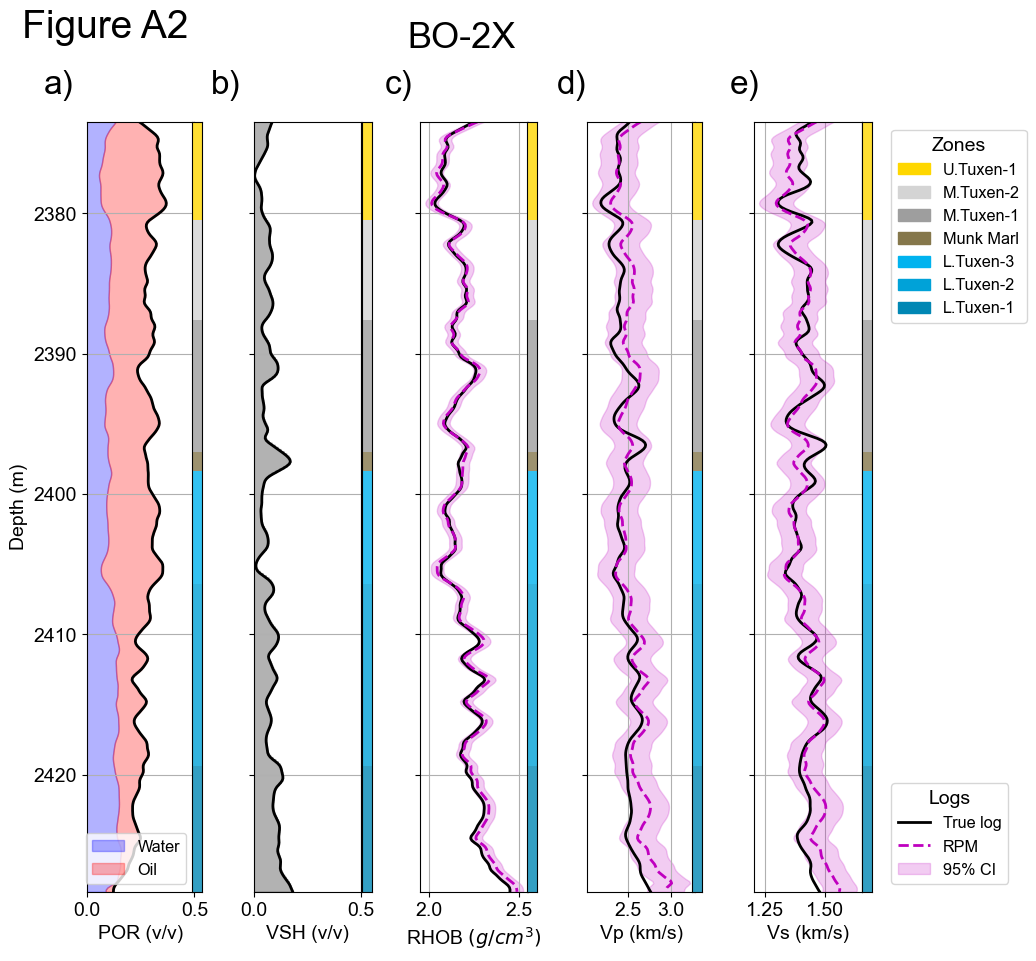

In [29]:
fix_txt = ['a)','b)','c)','d)','e)']
fig = plt.figure(figsize=(10,10))
fig.tight_layout
gs1 = gridspec.GridSpec(nrows=7, ncols=5, figure=fig,hspace =1.5 ,wspace=0.55)
axes0 = fig.add_subplot(gs1[0:7, 0])
axes1 = fig.add_subplot(gs1[0:7, 1])
axes2 = fig.add_subplot(gs1[0:7, 2])
axes3 = fig.add_subplot(gs1[0:7, 3])
axes4 = fig.add_subplot(gs1[0:7, 4])


x1 = bo2x['PHIE'][tux_idx:]*(1-bo2x['SWT'][tux_idx:])
x2 = bo2x['PHIE'][tux_idx:]*bo2x['SWT'][tux_idx:]
    
axes0.fill_betweenx(bo2x['DEPTH'][tux_idx:],x2,0, alpha=0.3,color='b',label='Water')
axes0.fill_betweenx(bo2x['DEPTH'][tux_idx:],x2,bo2x['PHIE'][tux_idx:], alpha=0.3,color='r',label='Oil')
axes0.plot(bo2x['PHIE'][tux_idx:],bo2x['DEPTH'][tux_idx:],'k', lw = 2,label='')
axes0.set_ylim(np.min(bo2x['DEPTH'][tux_idx:]),np.max(bo2x['DEPTH'][tux_idx:]))
axes0.invert_yaxis()
axes0.set_xlim(0,0.5)
axes0.set_xlabel('POR (v/v)' )
axes0.grid()
axes0.set_xticks(np.array([0, 0.5]))
axes0.legend(loc=4)
axes0.set_ylabel('Depth (m)')
    
axes1.fill_betweenx( bo2x['DEPTH'][tux_idx:], bo2x['VSHALE'][tux_idx:], 0, color='k', step="pre", alpha=0.3)
axes1.plot(bo2x['VSHALE'][tux_idx:],bo2x['DEPTH'][tux_idx:],'k-', lw = 2)
axes1.set_ylim(np.min(bo2x['DEPTH'][tux_idx:]),np.max(bo2x['DEPTH'][tux_idx:]))
axes1.invert_yaxis()
axes1.set_xlim(0,.5)
axes1.set_xlabel('VSH (v/v)' )
axes1.set_yticklabels('')
axes1.grid()

model_  = IF(Mspec,bo2x)
bo2x['Vp_IF'] ,bo2x['Vs_IF'], bo2x['Rho_IF'] = IF_vpvs(model_,0.3)    


predictions = np.array(bo2x['Rho_IF'][tux_idx:])
cf_intervals = np.zeros([predictions.size,3])
for p in range (predictions.size):
    cf_intervals[p,:] = get_prediction_interval(predictions[p], np.array(bo2x['RHOB'][tux_idx:]), predictions) #  [lower cf, prediction, upper cf] [95%]
axes2.fill_betweenx(bo2x['DEPTH'][tux_idx:],cf_intervals[:,0],cf_intervals[:,2],color='m',alpha=0.2, label='95% CI')

predictions = np.array(bo2x['Vp_IF'][tux_idx:])
cf_intervals = np.zeros([predictions.size,3])
for p in range (predictions.size):
    cf_intervals[p,:] = get_prediction_interval(predictions[p], np.array(bo2x['Vp'][tux_idx:]), predictions) #  [lower cf, prediction, upper cf] [95%]
axes3.fill_betweenx(bo2x['DEPTH'][tux_idx:],cf_intervals[:,0],cf_intervals[:,2],color='m',alpha=0.2, label='95% CI')
        
 
predictions = np.array(bo2x['Vs_IF'][tux_idx:])
cf_intervals = np.zeros([predictions.size,3])
for p in range (predictions.size):
    cf_intervals[p,:] = get_prediction_interval(predictions[p], np.array(bo2x['Vs'][tux_idx:]), predictions) #  [lower cf, prediction, upper cf] [95%]
axes4.fill_betweenx(bo2x['DEPTH'][tux_idx:],cf_intervals[:,0],cf_intervals[:,2],color='m',alpha=0.2, label='95% CI')
  

axes2.plot(bo2x['RHOB'][tux_idx:],bo2x['DEPTH'][tux_idx:],'k', lw = 2)
axes2.plot(bo2x['Rho_IF'][tux_idx:],bo2x['DEPTH'][tux_idx:],color='m',ls='--',label='RPM', lw=2)
axes2.set_ylim(np.min(bo2x['DEPTH'][tux_idx:]),np.max(bo2x['DEPTH'][tux_idx:]))
axes2.invert_yaxis()
axes2.set_xlabel('RHOB '+ r'$(g/cm^3)$' )
axes2.set_yticklabels('')
axes2.grid()
    
axes3.plot(bo2x['Vp'][tux_idx:],bo2x['DEPTH'][tux_idx:],'k', lw = 2, label='True log')
axes3.plot(bo2x['Vp_IF'][tux_idx:],bo2x['DEPTH'][tux_idx:],color='m',ls='--',label='RPM', lw=2)
axes3.set_ylim(np.min(bo2x['DEPTH'][tux_idx:]),np.max(bo2x['DEPTH'][tux_idx:]))
axes3.invert_yaxis()
axes3.set_xlabel('Vp (km/s)')
axes3.set_yticklabels('')
axes3.grid()


axes4.plot(bo2x['Vs'][tux_idx:],bo2x['DEPTH'][tux_idx:],'k',alpha=1,lw=2,label='Data')
axes4.plot(bo2x['Vs_IF'][tux_idx:],bo2x['DEPTH'][tux_idx:],color='m',ls='--',label='RPM', lw=2)
axes4.set_yticklabels('')
axes4.set_xlabel('Vs (km/s)')
axes4.axis('tight')
axes4.grid()
axes4.set_axisbelow(True)

axes4.set_ylim(np.min(bo2x['DEPTH'][tux_idx:]),np.max(bo2x['DEPTH'][tux_idx:]))
axes4.invert_yaxis()

axes_ = [axes0,axes1,axes2,axes3,axes4]

axes0.text(x = axes0.get_xlim()[0]-.3,   y = axes0.get_ylim()[1]-6, s = 'Figure A2',fontsize=28)
           
axes0.text(x = axes0.get_xlim()[0]-.2,   y = axes0.get_ylim()[1]-2, s = fix_txt[0],fontsize=24)
axes1.text(x = axes0.get_xlim()[0]-.2,   y = axes1.get_ylim()[1]-2, s = fix_txt[1],fontsize=24)
axes2.text(x = axes2.get_xlim()[0]-.2,   y = axes2.get_ylim()[1]-2, s = fix_txt[2],fontsize=24)
axes3.text(x = axes3.get_xlim()[0]-.35,   y = axes3.get_ylim()[1]-2, s = fix_txt[3],fontsize=24)
axes4.text(x = axes4.get_xlim()[0]-.1,   y = axes4.get_ylim()[1]-2, s = fix_txt[4],fontsize=24)

axes3.legend(bbox_to_anchor=(2.75, 0), loc='lower left', title='Logs')

ax0 = fig.add_axes([0.23,0.11,0.01,0.77])
ax1 = fig.add_axes([0.4,0.11,0.01,0.77])
ax2 = fig.add_axes([0.565,0.11,0.01,0.77])
ax3 = fig.add_axes([0.73,0.11,0.01,0.77])
ax4 = fig.add_axes([0.9,0.11,0.01,0.77])


ax_ = [ax0,ax1,ax2,ax3,ax4]


for i in range(len(ax_)):
    ax = ax_[i]
    cluster=np.repeat(np.expand_dims(df.loc[df['UWI'] == 'BO-2X']['Zone_encoded'][tux_idx:].values,1), 100, 1)
    ax.imshow(cluster, interpolation='none', aspect='auto', cmap=cmap_facies,vmin=0,vmax=16, alpha=0.8)
    ax.set_xticklabels([]);
    ax.set_yticklabels([]);
    ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    

patches_res = [UTuxen1_patch ,MTuxen2_patch ,MTuxen1_patch ,MunkMarl_patch ,
LTuxen3_patch ,LTuxen2_patch ,LTuxen1_patch ] #,Valhall_patch
#ax0.legend(handles=patches_res, title='Zones', bbox_to_anchor=(2.35, 1.02), loc='upper left',)

axes4.legend(handles=patches_res, title='Zones', bbox_to_anchor=(1.2, 1), loc='upper left',)
fig.suptitle('BO-2X', fontsize = 26)
#plt.savefig(fig_path+'bo2x_logs_IF.pdf',format='pdf', bbox_inches='tight')

In [30]:
mean_squared_error(bo2x['DTS'][tux_idx:],bo2x['Vs_IF'][tux_idx:], squared=False)  

KeyError: 'DTS'

In [31]:
# Physical properties of constituents
K_o=0.6     # oil
Rho_o=0.8

K_w=2.3
G_w=0         # water
Rho_w=1.03

K_ca=65  
G_ca=35       # calcite
Rho_ca=2.71

K_q=37  
G_q=44      # quartz
Rho_q=2.65

K_k=15  
G_k=7       # shale
Rho_k=2.7


# Volume fraction of large calcite and large silicates 
c_l = 0.1 # large calcite
q_l = 0.0 # large quartz
k_l = 0.05 # large kaolinite

# Volume fraction of small calcite and suspended silicates
c_s = 0.65 # small calcite
q_s = 0.1 # small quartz
k_s = 0.1 # small kaolinite
print('Total volume fraction of solids equals: ', np.round(c_l+q_l+k_l+c_s+q_s+k_s,0))

# Reservoir properties
Por_c = 0.66 # Critical porosity
Por=np.linspace(0,Por_c,100)
S_w = 1 # water saturation

# Modeling

K_sus = np.nan*np.ones((Por.size,11))
K_IF = np.nan*np.ones((Por.size,11))
G_IF = np.nan*np.ones((Por.size,11))
M_IF = np.nan*np.ones((Por.size,11))
Vp_IF = np.nan*np.ones((Por.size,11))
Vs_IF = np.nan*np.ones((Por.size,11))
AI_IF = np.nan*np.ones((Por.size,11))
PS_IF = np.nan*np.ones((Por.size,11))
Rho = np.nan*np.ones((Por.size,11))

n=0;
for IF in np.arange(0,1.1,0.1):
    

    K_f = S_w/K_w + (1-S_w)/K_o # Reuss
    #K_f = S_w*K_w + (1-S_w)*K_o; # Voigt
    
    K_sus[:,n] = ( Por/Por_c*K_f + (1-Por/Por_c)*((c_s*(1-IF)/K_ca) + (q_s/K_q) + (k_s/K_k) ) )**(-1) * (Por/Por_c + (1-Por/Por_c)*(c_s*(1-IF) + q_s + k_s) )

        
    Rho[:,n] = (Por/Por_c)*((1-IF)*c_s*Rho_ca + (Rho_w*S_w) + (Rho_o*(1-S_w)) + Rho_k*k_s + Rho_q*q_s) + (1-(Por/Por_c))*((IF*c_s+c_l)*Rho_ca + q_l*Rho_q + k_l*Rho_k);

    K_IF[:,n] = ( ((Por/Por_c)/(K_sus[:,n] + (4/3)*G_ca)) + (1-(Por/Por_c))* ( (((1-IF)*c_s + q_s + k_s)/(K_sus[:,n] + (4/3)*G_ca)) + ((IF*c_s+c_l)/(K_ca + (4/3)*G_ca)) + (q_l / (K_q + (4/3)*G_ca)) + (k_l / (K_k + (4/3)*G_ca)) ))**(-1) - (4/3)*G_ca

    zeta = (G_ca/6) * ((9*K_ca + 8*G_ca)/(K_ca + 2*G_ca));

    G_IF[:,n] = ( ((Por/Por_c)/zeta) +  (1-(Por/Por_c))*( (((1-IF)*c_s + q_s + k_s)/(zeta)) + ((IF*c_s+c_l)/(G_ca + zeta)) + (q_l/(G_q + zeta)) + (k_l / (G_k + zeta))) )**(-1) - zeta;
        
    M_IF[:,n] = K_IF[:,n] + (4/3)*G_IF[:,n]
    
    Vp_IF[:,n] = np.sqrt(K_IF[:,n] + (4/3)*G_IF[:,n] / Rho[:,n])
    Vs_IF[:,n] = np.sqrt(G_IF[:,n] / Rho[:,n])
    
    AI_IF[:,n] = Vp_IF[:,n] * Rho[:,n]
    PS_IF[:,n] = Vp_IF[:,n] / Vs_IF[:,n]
    
    n=n+1
    
    


bo2x['G'] = (bo2x['Vs'])**2 * bo2x['RHOB']
bo2x['K'] = (bo2x['Vp'])**2 * bo2x['RHOB'] - (4/3)*bo2x['G']
bo2x['M'] = bo2x['K'] + (4/3)*bo2x['G']

def vrh(volumes,k,mu):
    '''
    Calculates Voigt-Reuss-Hill bounds, (C) aadm 2015

    INPUT
    volumes: array with volumetric fractions
    k: array with bulk modulus
    mu: array with shear modulus

    OUTPUT
    k_u, k_l: upper (Voigt) and lower (Reuss) average of k
    mu_u, mu_l: upper (Voigt) and lower (Reuss) average of mu
    k0, mu0: Hill average of k and mu
    '''
    f=np.array(volumes).T
    k=np.resize(np.array(k),np.shape(f))
    mu=np.resize(np.array(mu),np.shape(f))
    ax=0 if f.ndim==1 else 1
    k_u = np.sum(f*k,axis=ax)
    k_l = 1./np.sum(f/k,axis=ax)
    mu_u = np.sum(f*mu,axis=ax)
    mu_l = 1./np.sum(f/mu,axis=ax)
    k0 = (k_u+k_l)/2.
    mu0 = (mu_u+mu_l)/2.
    return k_u, k_l, mu_u, mu_l, k0, mu0


def geqHSW(k1,g1,k2,g2,vol1):
    # Hashin-Shtrikman-Walpole bounds (Walpole 1966). More general version of the
    # Hashin-Shtrikman bounds where the constituent with the higher bulk
    # modulus does not neccessarily have to have the highest shear modulus.
    
    vol2 = 1-vol1
    Kmin = np.min([k1,k2])
    Kmax = np.max([k1,k2])
    Gmin = np.min([g1,g2])
    Gmax = np.max([g1,g2])
    
    ku = k1 + vol2/((k2-k1)**(-1) + vol1*(k1+4/3*Gmax)**(-1))
    kl = k1 + vol2/((k2-k1)**(-1) + vol1*(k1+4/3*Gmin)**(-1))
    gu = g1 + vol2/((g2-g1)**(-1) + \
    vol1*(g1 + Gmax/6 * ((9*Kmax+8*Gmax)/(Kmax+2*Gmax)))**(-1))
    gl = g1 + vol2/((g2-g1)**(-1) + \
    vol1*(g1 + Gmin/6 * ((9*Kmin+8*Gmin)/(Kmin+2*Gmin)))**(-1))
    
    return ku,kl,gu,gl

def geqGassmannDry(Ksat, Ks, Kf, Phi):
    #   Calculates the dry rock bulk modulus using Gassmann. 
    # 
    #   DryBulkModulus  - [array]; dry rock bulk modulus [GPa]
    #   Ksat            - [array]; effective (saturated) bulk modulus [GPa]
    #   Ks              - [array]; effective solid bulk modulus [GPa]
    #   Kf              - [array]; effective fluid bulk modulus [GPa]
    #   Phi             - [array]; porosity (in fraction of 1)
    DryBulkModulus   = (Ksat * ( Phi * Ks / Kf + 1 - Phi) - Ks) / \
                    (Phi * Ks / Kf + Ksat / Ks - 1 - Phi)
        
    return DryBulkModulus 

def geqGassmannFluidSubst(Ksat1,Ks,Kf1,Kf2,Phi):
    #   Calculate effective bulk modulus doing a Gassmann fluid substitution.
    # 
    #   NewEffectiveBulkModulus - [array]; effective bulk modulus after 
    #                               substituting with fluid 2 [GPa]
    #   Ksat1       - [array]; effective bulk modulus with (original) fluid 1 [GPa]
    #   Ks          - [array]; effective solid bulk modulus [GPa]
    #   Kf1         - [array]; effective bulk modulus of fluid 1 [GPa]
    #   Kf2         - [array]; effective bulk modulus of fluid 2 [GPa]
    #   Phi         - [array]; porosity  (in fraction of 1)
    
    Tmp = Ksat1/(Ks-Ksat1) - Kf1 / (Phi*(Ks-Kf1)) + \
    Kf2/(Phi*(Ks-Kf2))
    
    NewEffectiveBulkModulus = Ks*Tmp / (1+Tmp)
    
    return NewEffectiveBulkModulus

# Calculate the mineral/solid constituents using a Hashin-Shtrikman bound
_,bo2x['k_s'],_,_ = geqHSW(K_ca,G_ca,K_k,G_k,1-(bo2x['VSHALE']))

# Calculate the fluid bulk moduli using a Hill average
_,_,_,_,bo2x['k_f'],_ = vrh([bo2x['SWT'], 1-bo2x['SWT']], [K_w,K_o],[_,_])

# Calculate the dry bulk modulus using Gassmann
bo2x['k_d'] = geqGassmannDry(bo2x['K'],bo2x['k_s'],bo2x['k_f'],bo2x['PHIE'])

# Calculate water substituted bulk modulus using Gassmann
bo2x['k_w'] = geqGassmannFluidSubst(bo2x['K'],bo2x['k_s'],bo2x['k_f'],K_w,bo2x['PHIE'])

Total volume fraction of solids equals:  1.0


C:\Users\MLO\AppData\Local\Temp/ipykernel_11092/3409361389.py:74: RuntimeWarning: divide by zero encountered in true_divide
  PS_IF[:,n] = Vp_IF[:,n] / Vs_IF[:,n]


1
2
3
4
5
6


Text(0.020000000000000004, 17.4, 'Figure A1')

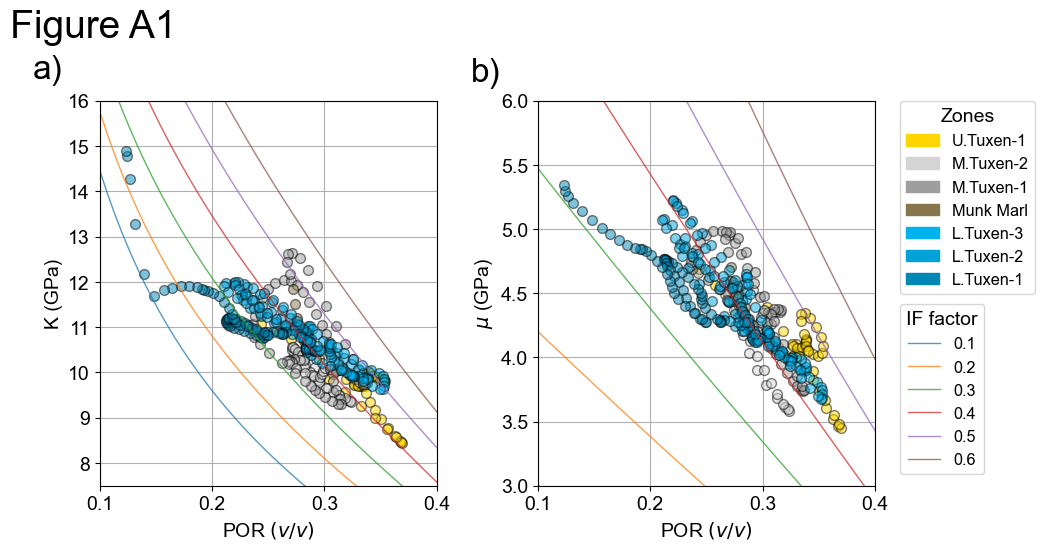

In [32]:
fig = plt.figure(figsize=(10,5))
gs1 = gridspec.GridSpec(nrows=1, ncols=2, figure=fig,hspace =.3 ,wspace=.3)
ax0 = fig.add_subplot(gs1[0,0])
ax1 = fig.add_subplot(gs1[0,1])

isoframe_curves = [1,2,3,4,5,6]

if S_w == 1:
    tmp = 'k_w'
else:
    tmp = 'K'

for i in range(tux_idx,bo2x.shape[0]):
    ax0.scatter(bo2x['PHIE'][i], bo2x[tmp][i], c=bo2x['Zone_encoded'][i], alpha=0.5, s=50,cmap=cmap_facies,vmin=0, vmax=16, edgecolors='k')
    
ax0.set_ylabel('K (GPa)')
ax0.grid()
ax0.set_axisbelow(True)
ax0.set_xlim([0.1,0.4])
ax0.set_ylim([7.5,16])
ax0.text(x =ax0.get_xlim()[0]-0.06, y = ax0.get_ylim()[1]+.5, s = 'a)',fontsize=24)

c_idx = 0    
for i in range(tux_idx,bo2x.shape[0]):
    ax1.scatter(bo2x['PHIE'][i], bo2x['G'][i], c=bo2x['Zone_encoded'][i], alpha=0.5, s=50,cmap=cmap_facies,vmin=0, vmax=16, edgecolors='k')

if_val = np.linspace(0,1,len(G_IF[0,:]))   

for i in isoframe_curves:
    print(i)
    ax0.plot(Por,K_IF[:,i],lw=1,alpha=0.75) 
    ax1.plot(Por,G_IF[:,i],lw=1,alpha=0.75,label=np.round(if_val[i],1))     

ax0.set_xlabel('POR ' + r'$(v/v)$')
ax1.set_xlabel('POR ' + r'$(v/v)$')
ax1.set_ylabel(r'$\mu$ ' +  '(GPa)')
ax1.grid()
ax1.set_axisbelow(True)
ax1.set_xlim([0.1,0.4])
ax1.set_ylim([3,6])

ax1.text(x = ax1.get_xlim()[0]-0.06, y = ax1.get_ylim()[1]+.15, s = 'b)', fontsize=24)

patches_res = [UTuxen1_patch ,MTuxen2_patch ,MTuxen1_patch ,MunkMarl_patch ,
LTuxen3_patch ,LTuxen2_patch ,LTuxen1_patch ] #,Valhall_patch

ax1.legend(bbox_to_anchor=(1.05,0.01),title='IF factor', loc='lower left')

ax0.legend(handles=patches_res, title='Zones', bbox_to_anchor=(2.35, 1.02), loc='upper left',)

ax0.text(x =ax0.get_xlim()[0]-0.08, y = ax0.get_ylim()[1]+1.4, s = 'Figure A1',fontsize=28)


#plt.savefig(fig_path+'IF_bo2x_model.pdf',format='pdf', bbox_inches='tight')

In [33]:
import matplotlib.patches as mpatches 
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
LR_patch   =  mpatches.Patch(color='C0', alpha=0.2,label='95% CI')
RFR_patch  =  mpatches.Patch(color='C1', alpha=0.2,label='95% CI')
SVR_patch  =  mpatches.Patch(color='C2', alpha=0.2,label='95% CI')
MLPR_patch =  mpatches.Patch(color='C3', alpha=0.2,label='95% CI')
RPM_patch  =  mpatches.Patch(color='C4', alpha=0.2,label='95% CI')
log_patch  =  mpatches.Patch(color='white', alpha=0.0,label='95% CI')

LR_line = Line2D([0], [0], color='C0', lw=2, label='LR')
RFR_line   = Line2D([0], [0], color='C1', lw=2, label='RFR')
SVR_line   = Line2D([0], [0], color='C2', lw=2, label='SVR')
MLPR_line   = Line2D([0], [0], color='C3', lw=2, label='MLPR')
RPM_line   = Line2D([0], [0], color='m', lw=2, label='RPM')
log_line = Line2D([0], [0], color='k', lw=2, label='True log')

#scatterplot
log_line_scatter = Line2D([0], [0], color='k', lw=3, label='True log')
data_scatter = Line2D([0], [0], marker='o', color='k', label='Scatter',
                          markerfacecolor='k',alpha=1, markersize=13),
line_1 = Line2D([0], [0], color='k', ls='--', label='True log')


#patches_model = [LR_patch  ,RFR_patch ,SVR_patch ,MLPR_patch,RPM_patch] #,Valhall_patch

#legend_elements1 = [Line2D([0], [0], color='C0', lw=2, label='LR'),
#                  Line2D([0], [0], color='C1', lw=2, label='RFR'),
#                  Line2D([0], [0], color='C2', lw=2, label='SVR'),
#                  Line2D([0], [0], color='C3', lw=2, label='MLPR'),
#                  Line2D([0], [0], color='m', lw=2, label='RPM'),
#                  ]

#legend_elements2 = [Patch(facecolor='orange', edgecolor='r',
#                         label='Color Patch'),
#                   Patch(facecolor='orange', edgecolor='r',
#                         label='Color Patch'),
#                         label='Color Patch'),
#                   Patch(facecolor='orange', edgecolor='r',
#                         label='Color Patch'),
#                   Patch(facecolor='orange', edgecolor='r',
#                         label='Color Patch'),
#                   ]


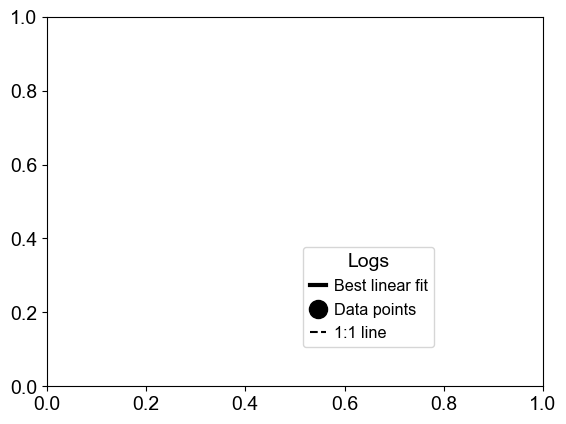

In [34]:
plt.figure()
plt.legend(handles=[log_line_scatter, data_scatter, line_1],
          labels=['Best linear fit','Data points', '1:1 line'],
          ncol=1,handletextpad=0.5, handlelength=1.0, columnspacing=-.5,
          bbox_to_anchor=(.5, .4), loc='upper left',title='Logs')

0
0.08592324651905427
1
0.05163286646648136
2
0.0650417472873908
3
0.04638317519449547


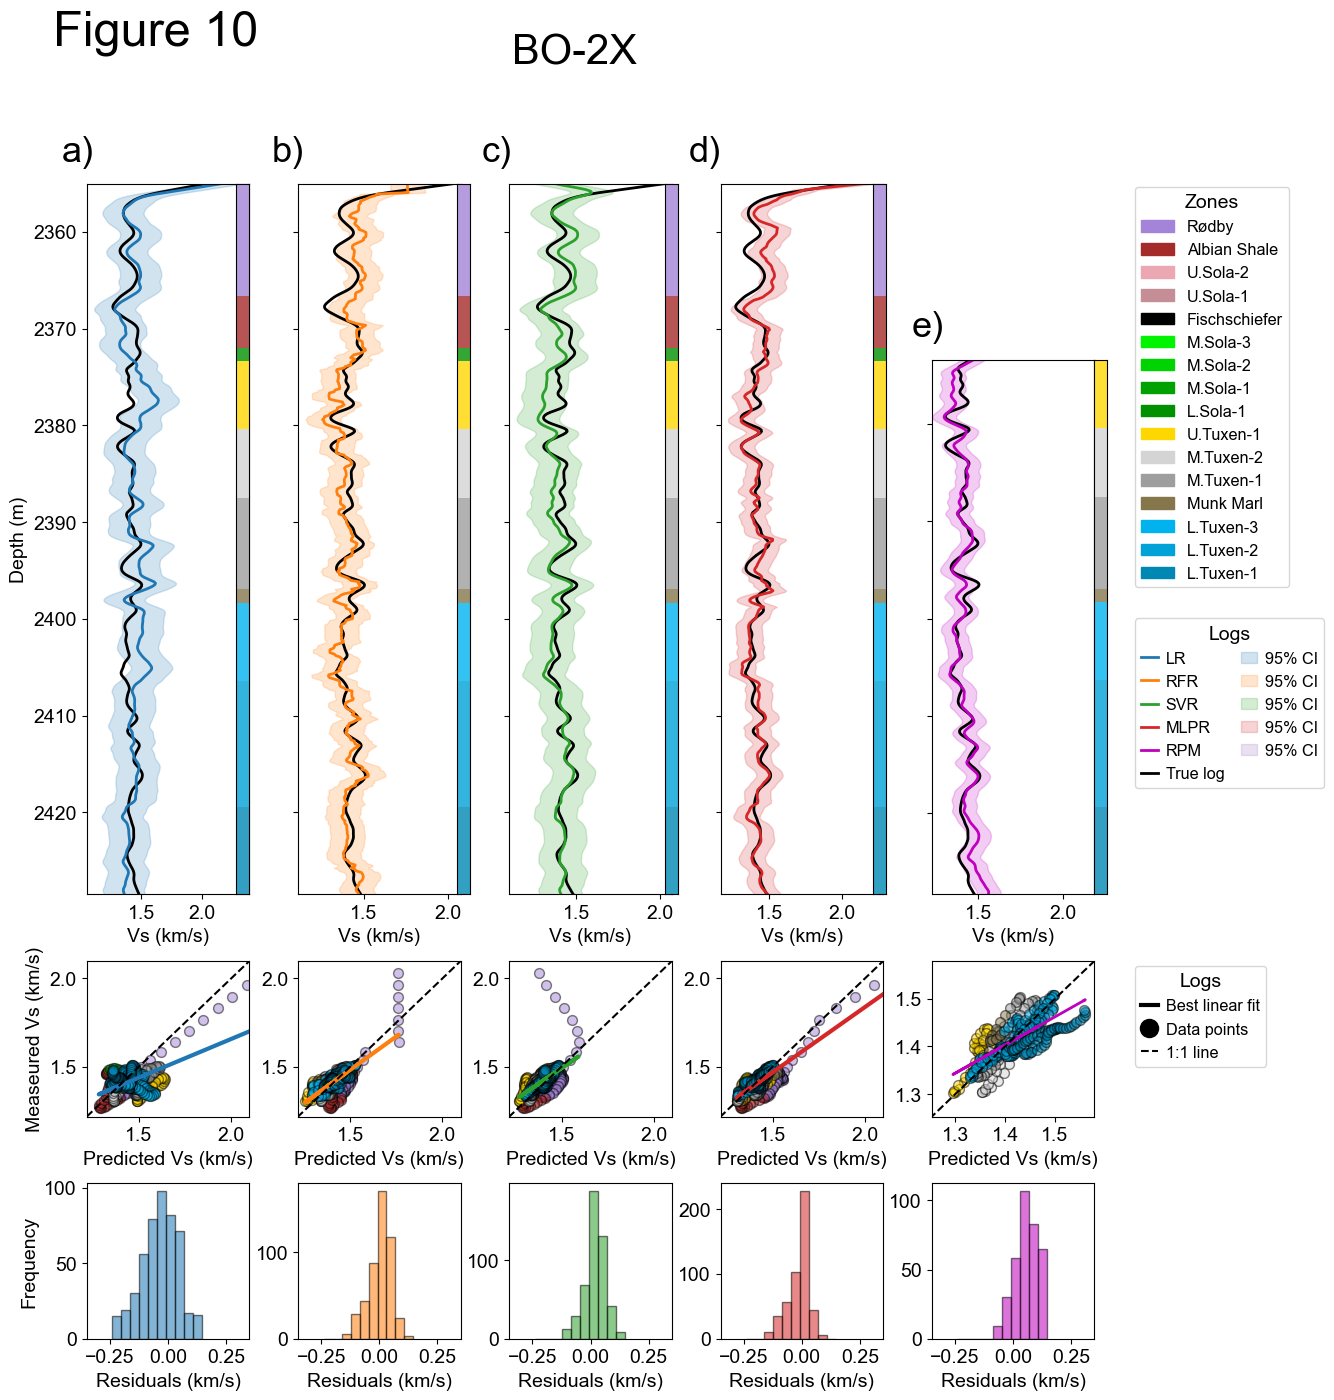

In [35]:
dpt = df.loc[df['UWI'] == 'BO-2X']['DEPTH'].values
scat_fac = df.loc[df['UWI'] == 'BO-2X']['Zone_encoded'].values

fig = plt.figure(figsize=(13,15))
fig.tight_layout
gs1 = gridspec.GridSpec(nrows=11, ncols=5, figure=fig,hspace = 1.5 ,wspace=0.3)

clr_list = ['C0', 'C1', 'C2', 'C3']
k=0
model_list = ['lr', 'rfr' , 'svr' , 'mlp']
model_names = ['LR', 'RFR', 'SVR', 'MLP']

list_ = ['a)', 'b)', 'c)','d)']

ax_label = []

for i in range(len(model_list)):
    print(i)
   
    ax = fig.add_subplot(gs1[0:7, i])
    ax.plot(test_logs['true'][:dpt.size], dpt, 'k', lw=2)
    ax.plot(test_logs[model_list[i]][:dpt.size], dpt, clr_list[i], lw=2)
    test_ax = ax.get_xlim()
    ax.set_xlabel('Vs (km/s)')
    ax.set_ylim(dpt.max(),dpt.min())
#    ax.set_title(model_names[i])
    #ax.text(x = ax.get_xlim()[0]-0.1, y = ax1.get_ylim()[0], s = list_[i], fontsize=24)
    if i == 0:
        ax.set_ylabel('Depth (m)')
    else:
        ax.set_yticklabels([])
    
    predictions = np.array(test_logs[model_list[i]][:dpt.size].values)
    cf_intervals = np.zeros([predictions.size,3])
    for p in range (predictions.size):
        cf_intervals[p,:] = get_prediction_interval(predictions[p], test_logs['true'][:dpt.size].values, predictions) #  [lower cf, prediction, upper cf] [95%]
    ax.fill_betweenx(dpt,cf_intervals[:,0],cf_intervals[:,2],color=clr_list[i] ,alpha=0.2, label='95% CI')

    ax = fig.add_subplot(gs1[7:9, i])
    c_idx = 0    
    for k in range(dpt.size):
        ax.scatter(test_logs[model_list[i]][:dpt.size][k],test_logs['true'][:dpt.size][k], c=scat_fac[k], alpha=0.5, s=50,cmap=cmap_facies,vmin=0, vmax=16, edgecolors='k')

    #ax.scatter(test_logs[model_list[i]][:dpt.size], test_logs['true'][:dpt.size],alpha = 0.25,label = 'Data points')
    model = np.polyfit(test_logs[model_list[i]][:dpt.size], test_logs['true'][:dpt.size], 1)
    ax.plot(test_logs[model_list[i]][:dpt.size], model[0]*test_logs[model_list[i]][:dpt.size] + model[1],color= clr_list[i],linewidth=3, label='Best linear fit')
    ax.plot([0,10],[0,10], 'k--', label = '1:1 line')

    
    if i == 0:
        ax.set_ylabel('Measeured Vs (km/s)')
    ax.set_xlabel('Predicted Vs (km/s)')
    ax.set_xlim(test_logs['true'][:dpt.size].min()-.05,test_logs['true'][:dpt.size].max()+.07)
    ax.set_ylim(test_logs['true'][:dpt.size].min()-.05,test_logs['true'][:dpt.size].max()+.07)
    #ax.set_xlim(test_logs['true'][dpt.size:].min()-.1,test_logs['true'][dpt.size:].max()+.05)
    #ax.set_ylim(test_logs['true'][dpt.size:].min()-.1,test_logs['true'][dpt.size:].max()+.05)
    
    if i == 3:
        ax.legend(handles=[log_line_scatter, data_scatter, line_1],
          labels=['Best linear fit','Data points', '1:1 line'],
          ncol=1,handletextpad=0.5, handlelength=1.0, columnspacing=-.5,
          bbox_to_anchor=(2.5, .27), loc='lower left',title='Logs')
    
    
    ax = fig.add_subplot(gs1[9:, i])
    ax.set_xlim(-0.35,0.35)
    if i == 0:
        _, bins, _ = plt.hist(test_logs['true'][:dpt.size]-test_logs[model_list[i]][:dpt.size],color=clr_list[i] , edgecolor='k',bins=10,alpha = 0.55)
        plt.ylabel('Frequency')
        plt.xlabel('Residuals (km/s)')
    else:
        plt.hist(test_logs['true'][:dpt.size]-test_logs[model_list[i]][:dpt.size], color=clr_list[i] ,edgecolor='k',bins=bins,alpha = 0.55)
        plt.xlabel('Residuals (km/s)')
    
    print(mean_squared_error(test_logs['true'][:dpt.size],test_logs[model_list[i]][:dpt.size], squared=False))

ax0 = fig.add_axes([0.24,0.4062,0.01,0.4735])
ax1 = fig.add_axes([0.41,0.4062,0.01,0.4735])
ax2 = fig.add_axes([0.57,0.4062,0.01,0.4735])
ax3 = fig.add_axes([0.73, 0.4062,0.01,0.4735])

ax_ = [ax0,ax1,ax2,ax3]

ax0.legend(handles=[LR_line ,RFR_line,SVR_line,MLPR_line,RPM_line, log_line,
          LR_patch, RFR_patch, SVR_patch, MLPR_patch, RPM_patch, log_patch],
          labels=['LR', 'RFR', 'SVR', 'MLPR', 'RPM','True log','95% CI', '95% CI', '95% CI', '95% CI', '95% CI',''],
          ncol=2,handletextpad=0.5, handlelength=1.0, columnspacing=1,
          bbox_to_anchor=(68.5, .4), loc='upper left',title='Logs')
#legend(handles=((legend_elements, patches_model)), title='test', bbox_to_anchor=(1.2, 0), loc='upper left',)


for i in range(4):
    ax = ax_[i]
    cluster=np.repeat(np.expand_dims(df.loc[df['UWI'] == 'BO-2X']['Zone_encoded'].values,1), 100, 1)
    ax.imshow(cluster, interpolation='none', aspect='auto', cmap=cmap_facies,vmin=0,vmax=16, alpha=0.8)
    ax.set_xticklabels([]);
    ax.set_yticklabels([]);
    ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
 

ax_if = fig.add_axes([0.775,0.4062,0.125,0.356])
ax_if.plot(bo2x['Vs'][tux_idx:],bo2x['DEPTH'][tux_idx:],'k',alpha=1,lw=2,label='Data')
ax_if.plot(bo2x['Vs_IF'][tux_idx:],bo2x['DEPTH'][tux_idx:],color='m',label='RPM', lw=2)
ax_if.set_ylim(bo2x['DEPTH'][tux_idx:].max(),bo2x['DEPTH'][tux_idx:].min())
ax_if.set_xlim(test_ax)
#ax_if.set_title('RPM')
ax_if.set_yticklabels([]);
ax_if.set_xlabel('Vs (km/s)')

ax4 = fig.add_axes([0.9, 0.4062,0.01,0.356])
cluster=np.repeat(np.expand_dims(df.loc[df['UWI'] == 'BO-2X']['Zone_encoded'][tux_idx:].values,1), 100, 1)
ax4.imshow(cluster, interpolation='none', aspect='auto', cmap=cmap_facies,vmin=0,vmax=16, alpha=0.8)
ax4.set_xticklabels([]);
ax4.set_yticklabels([]);
ax4.tick_params(left = False, right = False , labelleft = False ,
            labelbottom = False, bottom = False)

predictions = np.array(bo2x['Vs_IF'][tux_idx:])
cf_intervals = np.zeros([predictions.size,3])
for p in range (predictions.size):
    cf_intervals[p,:] = get_prediction_interval(predictions[p], np.array(bo2x['Vs'][tux_idx:]), predictions) #  [lower cf, prediction, upper cf] [95%]
ax_if.fill_betweenx(bo2x['DEPTH'][tux_idx:],cf_intervals[:,0],cf_intervals[:,2],color='m',alpha=0.2, label='95% CI')

ax_if.legend()

ax_if.legend(handles=patches, title='Zones', bbox_to_anchor=(1.2, 1.34), loc='upper left',)


ax = fig.add_subplot(gs1[7:9, 4])
c_idx = 0    
for k in range(tux_idx, dpt.size-1):
    ax.scatter(bo2x['Vs_IF'][tux_idx:][k],bo2x['Vs'][tux_idx:][k], c=scat_fac[k], alpha=0.5, s=50,cmap=cmap_facies,vmin=0, vmax=16, edgecolors='k')
ax.set_xlim(bo2x['Vs'][tux_idx:].min()-.05,bo2x['Vs'][tux_idx:].max()+.07)
ax.set_ylim(bo2x['Vs'][tux_idx:].min()-.05,bo2x['Vs'][tux_idx:].max()+.07)
#ax.scatter(test_logs[model_list[i]][:dpt.size], test_logs['true'][:dpt.size],alpha = 0.25,label = 'Data points')
model = np.polyfit(bo2x['Vs_IF'][tux_idx:], bo2x['Vs'][tux_idx:], 1)
ax.plot(bo2x['Vs_IF'][tux_idx:], model[0]*bo2x['Vs_IF'][tux_idx:] + model[1],color= 'm',linewidth=2, label='Best linear fit')
ax.plot([0,10],[0,10], 'k--', label = '1:1 line')
ax.set_xlabel('Predicted Vs (km/s)')
ax = fig.add_subplot(gs1[9:, 4])
ax.set_xlim(-0.35,0.35)

plt.hist(bo2x['Vs'][tux_idx:][k]-bo2x['Vs_IF'][tux_idx:], color='m' ,edgecolor='k',bins=bins,alpha = 0.55)
plt.xlabel('Residuals (km/s)')

ax_if.text(-3.95,2353,s='a)', fontsize=26)
ax_if.text(-2.7 ,2353,s='b)', fontsize=26)
ax_if.text(-1.45,2353,s='c)', fontsize=26)
ax_if.text(-0.22,2353,s='d)', fontsize=26)
ax_if.text(    1.1,2371,s='e)', fontsize=26)

ax_if.text(-4,2341,s='Figure 10', fontsize=35)


plt.suptitle('BO-2X', fontsize = 30);



#print(mean_squared_error(bo2x['DTS'][tux_idx:],bo2x['Vs_IF'][tux_idx:], squared=False))
#plt.savefig(fig_path+'Figure_10.pdf',format='pdf', bbox_inches='tight')

0
0.04557089585939724
1
0.05959610014907352
2
0.09688896393767299
3
0.05288210556339361


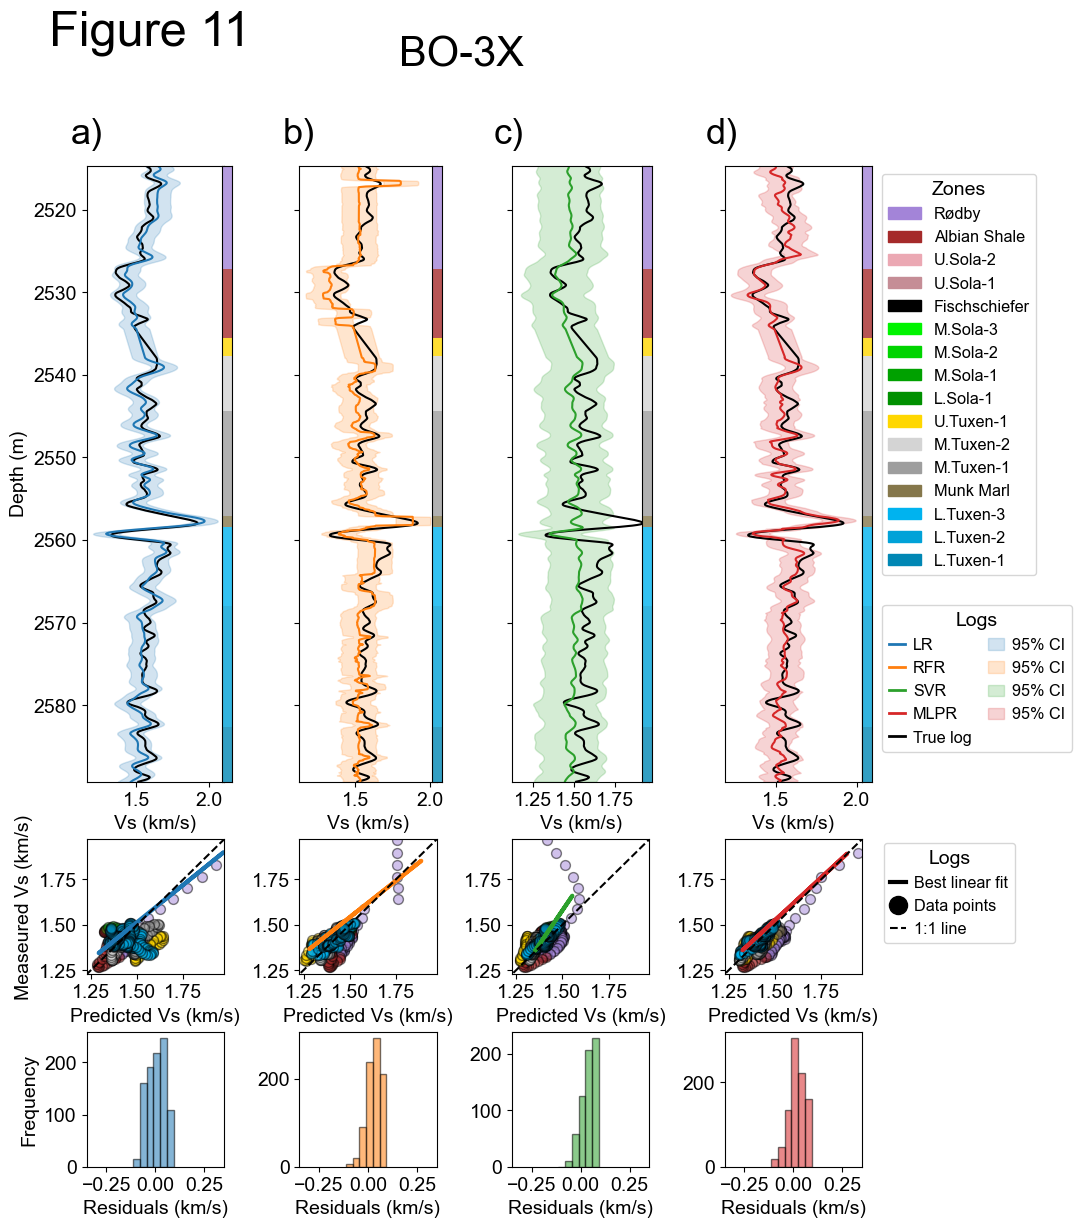

In [36]:
dpt_ = df.loc[df['UWI'] == 'BO-3X']['DEPTH'].values


fig = plt.figure(figsize=(10,13))
fig.tight_layout
gs1 = gridspec.GridSpec(nrows=11, ncols=4, figure=fig,hspace = 1.5 ,wspace=0.55)

clr_list = ['C0', 'C1', 'C2', 'C3']
k=0
model_list = ['lr', 'rfr' , 'svr' , 'mlp']
model_names = ['LinReg', 'RFR', 'SVR', 'MLP']

for i in range(len(model_list)):
    print(i)
    
    ax = fig.add_subplot(gs1[0:7, i])
    ax.plot(test_logs['true'][dpt.size:], dpt_, 'k')
    ax.plot(test_logs[model_list[i]][dpt.size:], dpt_, clr_list[i], label = model_names[i])
    ax.set_ylim(dpt_.max(),dpt_.min())
#    ax.set_title(model_names[i])
    ax.set_xlabel('Vs (km/s)')
    if i == 0:
        ax.set_ylabel('Depth (m)')
        ax.text(5.4, 2512,s='d)', fontsize=26)
        ax.text(3.95,2512,s='c)', fontsize=26)
        ax.text(2.5 ,2512,s='b)', fontsize=26)
        ax.text(1.05,2512,s='a)', fontsize=26)
        ax.text(0.9,2500,s='Figure 11', fontsize=35)
    else:
        ax.set_yticklabels([])
        

    #if i == 3:
        
    predictions = np.array(test_logs[model_list[i]][dpt.size:].values)
    cf_intervals = np.zeros([predictions.size,3])
    
    for p in range (predictions.size):
        cf_intervals[p,:] = get_prediction_interval(predictions[p], test_logs['true'][dpt.size:].values, predictions) #  [lower cf, prediction, upper cf] [95%]
    ax.fill_betweenx(dpt_,cf_intervals[:,0],cf_intervals[:,2],color=clr_list[i] ,alpha=0.2, label='95% CI')

    
    ax = fig.add_subplot(gs1[7:9, i])
    #ax.scatter(test_logs[model_list[i]][dpt.size:], test_logs['true'][dpt.size:],alpha = 0.25,label = 'Data points')
    c_idx = 0    
    for k in range(dpt.size):
        ax.scatter(test_logs[model_list[i]][:dpt.size][k],test_logs['true'][:dpt.size][k], c=scat_fac[k], alpha=0.5, s=50,cmap=cmap_facies,vmin=0, vmax=16, edgecolors='k')
    
    model = np.polyfit(test_logs[model_list[i]][dpt.size:], test_logs['true'][dpt.size:], 1)
    ax.plot(test_logs[model_list[i]][dpt.size:], model[0]*test_logs[model_list[i]][dpt.size:] + model[1],color= clr_list[i],linewidth=3, label='Best linear fit')
    ax.plot([0,10],[0,10], 'k--', label = '1:1 line')
    if i == 0:
        ax.set_ylabel('Measeured Vs (km/s)')
    ax.set_xlabel('Predicted Vs (km/s)')
    ax.set_xlim(test_logs['true'][dpt.size:].min()-.1,test_logs['true'][dpt.size:].max()+.05)
    ax.set_ylim(test_logs['true'][dpt.size:].min()-.1,test_logs['true'][dpt.size:].max()+.05)
    
    

    ax = fig.add_subplot(gs1[9:, i])
    ax.set_xlim(-0.35,0.35)
    if i == 0:
        _, bins, _ = plt.hist(test_logs['true'][dpt.size:]-test_logs[model_list[i]][dpt.size:],color=clr_list[i] , edgecolor='k',bins=6,alpha = 0.55)
        plt.ylabel('Frequency')
        plt.xlabel('Residuals (km/s)')
    else:
        plt.hist(test_logs['true'][dpt.size:]-test_logs[model_list[i]][dpt.size:], color=clr_list[i] ,edgecolor='k',bins=bins,alpha = 0.55)
        plt.xlabel('Residuals (km/s)')
    if i == 3:
        ax.legend(handles=[log_line_scatter, data_scatter, line_1],
          labels=['Best linear fit','Data points', '1:1 line'],
          ncol=1,handletextpad=0.5, handlelength=1.0, columnspacing=-.5,
          bbox_to_anchor=(1.1, 1.6), loc='lower left',title='Logs')

    print(mean_squared_error(test_logs['true'][dpt.size:],test_logs[model_list[i]][dpt.size:], squared=False))


ax0 = fig.add_axes([0.26,0.4062,0.01,0.4735])
ax1 = fig.add_axes([0.47,0.4062,0.01,0.4735])
ax2 = fig.add_axes([0.68,0.4062,0.01,0.4735])
ax3 = fig.add_axes([0.9, 0.4062,0.01,0.4735])


ax0.legend(handles=[LR_line ,RFR_line,SVR_line,MLPR_line, log_line,
          LR_patch, RFR_patch, SVR_patch, MLPR_patch, log_patch],
          labels=['LR', 'RFR', 'SVR', 'MLPR','True log','95% CI', '95% CI', '95% CI', '95% CI',''],
          ncol=2,handletextpad=0.5, handlelength=1.0, columnspacing=1,
          bbox_to_anchor=(65.25, .3), loc='upper left',title='Logs')


ax_ = [ax0,ax1,ax2,ax3]


for i in range(4):
    ax = ax_[i]
    cluster=np.repeat(np.expand_dims(df.loc[df['UWI'] == 'BO-3X']['Zone_encoded'].values,1), 100, 1)
    ax.imshow(cluster, interpolation='none', aspect='auto', cmap=cmap_facies,vmin=0,vmax=16, alpha=0.8)
    ax.set_xticklabels([]);
    ax.set_yticklabels([]);
    ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
ax.legend(handles=patches, title='Zones', bbox_to_anchor=(1.2, 1), loc='upper left',)


plt.suptitle('BO-3X', fontsize = 30);
#plt.savefig(fig_path+'Figure_11.pdf',format='pdf', bbox_inches='tight')

In [37]:
dpt.size

483

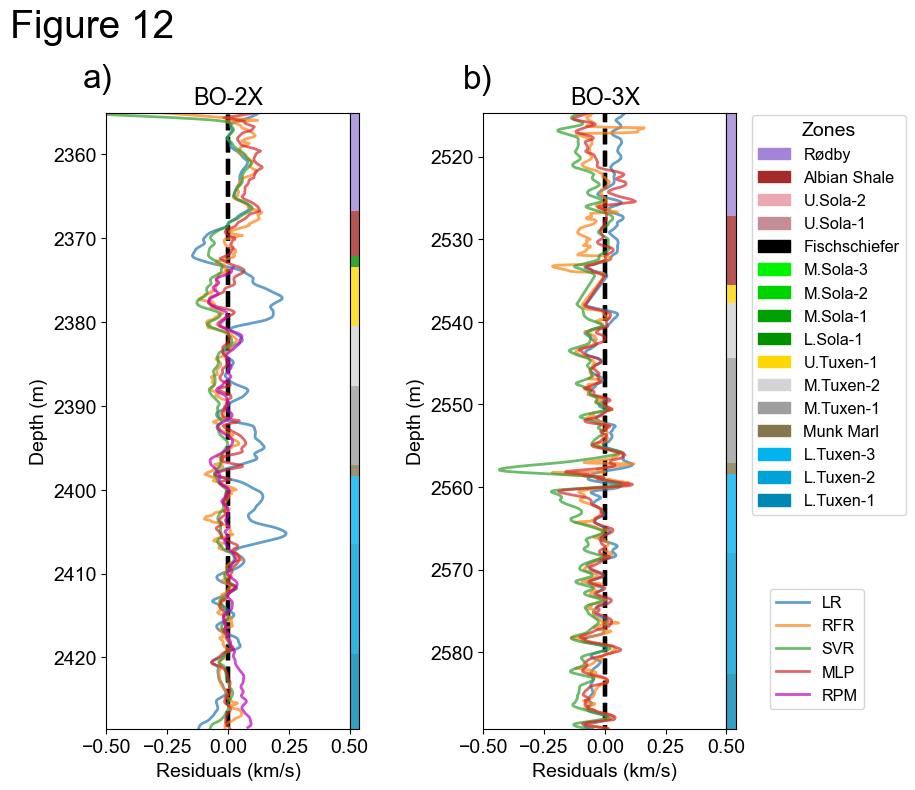

In [40]:
fig = plt.figure(figsize=(8,8))
fig.tight_layout
gs1 = gridspec.GridSpec(nrows=11, ncols=2, figure=fig,hspace = 1.5 ,wspace=0.55)
ax1 = fig.add_subplot(gs1[:, 0])

clr_list = ['C0', 'C1', 'C2', 'C3','m']
k=0
model_list = ['lr', 'rfr' , 'svr' , 'mlp','RPM']
model_names = ['LR', 'RFR', 'SVR', 'MLP','RPM']

ax_label = []

for i in range(len(model_list)):
    if i ==4:
        ax1.plot(bo2x['Vs_IF'][tux_idx:dpt.size]-test_logs['true'][tux_idx:dpt.size-1], bo2x['DEPTH'][tux_idx:], clr_list[i], lw=2, label = model_names[i], alpha=0.7)
        ax1.legend(bbox_to_anchor=(3.15, .24))
    else:
    #ax.plot(test_logs['true'][:dpt.size], dpt, 'k', lw=2)
        ax1.plot(test_logs[model_list[i]][:dpt.size] - test_logs['true'][:dpt.size], dpt, clr_list[i], lw=2, label = model_names[i], alpha=0.7)
        test_ax = ax1.get_xlim()
        ax1.set_xlabel('Residuals (km/s)')
        ax1.set_ylabel('Depth (m)')
        ax1.set_ylim(dpt.max(),dpt.min())
        ax1.set_title('BO-2X')
        ax1.vlines(0,2300,2600, lw = 3, ls='--',color='k')
ax1.text(x =ax1.get_xlim()[0]+0.1, y = ax1.get_ylim()[1]-3, s = 'a)',fontsize=24)
ax1.text(x =ax1.get_xlim()[0]-.2, y = ax1.get_ylim()[1]-9, s = 'Figure 12',fontsize=28)
ax1.set_xlim([-.5,.5])

ax0 = fig.add_axes([0.429,0.11,0.012,0.77])        
ax = ax0
cluster=np.repeat(np.expand_dims(df.loc[df['UWI'] == 'BO-2X']['Zone_encoded'].values,1), 100, 1)
ax0.imshow(cluster, interpolation='none', aspect='auto', cmap=cmap_facies,vmin=0,vmax=16, alpha=0.8)
ax0.set_xticklabels([]);
ax0.set_yticklabels([]);
ax0.tick_params(left = False, right = False , labelleft = False ,
            labelbottom = False, bottom = False)


ax2 = fig.add_subplot(gs1[:, 1])

for i in range(len(model_list)-1):
    #ax.plot(test_logs['true'][:dpt.size], dpt, 'k', lw=2)
    ax2.plot(test_logs[model_list[i]][dpt.size:] - test_logs['true'][dpt.size:], dpt_, clr_list[i], lw=2, alpha=0.7 )
    #test_ax = ax1.get_xlim()
    ax2.set_ylabel('Depth (m)')
    ax2.set_xlabel('Residuals (km/s)')
    ax2.set_ylim(dpt_.max(),dpt_.min())
    ax2.set_title('BO-3X')
    ax2.vlines(0,2300,2600, lw = 3, ls='--',color='k')
    ax2.legend(handles=patches, title='Zones', bbox_to_anchor=(1.07, 1.01), loc='upper left',)
ax2.text(x =ax2.get_xlim()[0]-.12, y = ax2.get_ylim()[1]-3, s = 'b)',fontsize=24) 
ax2.set_xlim([-.5,.5])

ax3 = fig.add_axes([0.9,0.11,0.012,0.77])
ax = ax3
cluster=np.repeat(np.expand_dims(df.loc[df['UWI'] == 'BO-3X']['Zone_encoded'].values,1), 100, 1)
ax3.imshow(cluster, interpolation='none', aspect='auto', cmap=cmap_facies,vmin=0,vmax=16, alpha=0.8)
ax3.set_xticklabels([]);
ax3.set_yticklabels([]);
ax3.tick_params(left = False, right = False , labelleft = False ,
            labelbottom = False, bottom = False)
#plt.savefig(fig_path+'Figure_12.pdf',format='pdf', bbox_inches='tight')
plt.savefig('C:/Users/MLO/OneDrive - GEUS/'+'Figure_12.png',format='png', bbox_inches='tight',dpi=150)

In [ ]:
plt.scatter(test_logs[model_list[i]][dpt.size:] - test_logs['true'][dpt.size:], dpt_,s=10, lw=2, alpha=0.7)

In [ ]:
print(test_logs['true'][tux_idx:dpt.size-1].shape)
print(bo2x['Vs_IF'][tux_idx:dpt.size].shape)
print(bo2x['DEPTH'][tux_idx:].shape)

In [ ]:
overburden = df.loc[(df['Formation'] == 'Albian Shale') | (df['Formation'] == 'Rødby') ]

In [ ]:
#sns.pairplot(overburden.sort_values(by=['Zone_encoded'])[['Formation', 'GRN','DTC','DENS','NEUT','RMED_log10','DTS']],hue='Formation', palette = facies_colors[:2])

In [ ]:
overburden.shape[0]

In [ ]:
overburden.shape[0] / df.shape[0]

In [ ]:
axes = sns.displot(overburden, x="Vs", hue="UWI", kind="kde", fill=True)
plt.title('Albian Shale and Rødby fm')
plt.xlabel('Vs (km/s)')
plt.text(x = 0.2, y=2, s='Figure 13', fontsize=26)
#plt.savefig(fig_path+'Figure_13.pdf',format='pdf', bbox_inches='tight')

In [ ]:
axes = sns.displot(df.loc[df['Formation'] == 'U.Tuxen-1'], x="DTS", hue="UWI", kind="kde", fill=True)
plt.title('Albian Shale and Rødby fm')
plt.xlabel('DTS (km/s)')
plt.text(x = 0.2, y=2, s='Figure 13', fontsize=26)
#plt.savefig(fig_path+'Figure_13.pdf',format='pdf', bbox_inches='tight')

In [ ]:
plt.plot(df.loc[(df['Formation'] == 'U.Tuxen-1') & (df['UWI'] == 'BO-3X')]['DTS'], df.loc[(df['Formation'] == 'U.Tuxen-1') & (df['UWI'] == 'BO-3X')]['DEPTH'])

In [ ]:
sns.pairplot(overburden.sort_values(by=['UWI'])[['UWI', 'GRN','DTC','DENS','NEUT','RMED_log10','DTS']],hue='UWI', )

# Tuxen Map

In [ ]:
path_horizons = '//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/horizons/Horizons_Florian/LOCRETA surfaces meters/'
hrz_file = 'TopTuxen_Florian (Depth 1)'
hrz = pd.read_csv(path_horizons+hrz_file, names=["cdp_x","cdp_y","z_m","row","column"], sep='\s+', skiprows= 20)

In [ ]:
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

In [ ]:
from scipy.interpolate import griddata

xi = np.linspace(hrz.cdp_x.min(), hrz.cdp_x.max(), 1000)
yi = np.linspace(hrz.cdp_y.min(), hrz.cdp_y.max(), 1000)
X, Y = np.meshgrid(xi, yi)
Z = griddata((hrz.cdp_x, hrz.cdp_y), hrz.z_m, (X, Y))


In [ ]:
Z = Z[ find_nearest(yi,6173000.0) : find_nearest(yi,6194500.0)    ,  find_nearest(xi,594000) : find_nearest(xi,607500)]

In [ ]:
x_min = xi[find_nearest(xi,594000.0)]
x_max = xi[find_nearest(xi,607500)]
y_min = yi[find_nearest(yi,6173000.0)]
y_max = yi[find_nearest(yi,6194500.0)]

In [ ]:
cut_map = [x_min,x_max,y_min,y_max]

In [ ]:
cut_map

In [ ]:
print(Z.min(),Z.max())

In [ ]:
from welly import Well

BO2 = Well.from_las(path_las + 'BO-2X_with_S_sonic.las')
BO3 = Well.from_las(path_las + 'BO-3X_with_S_sonic.las')
JUDE1 = Well.from_las(path_las + 'Jude-1-DSN_2PETREL.las')
BOJE2C = Well.from_las(path_las+'/BOJE-2C/'+'BOJE-2C_PPEVAL.las')
SIAH1X = Well.from_las(path_las+'SIAH_NE-01X_LOGS.las')
VALDEMAR2 = Well.from_las(path_las+'VALDEMAR-2.las')

JUDE1.location.x = 597133
JUDE1.location.y =  6180733
BOJE2C.location.x = 604825.61
BOJE2C.location.y = 6192003.11
SIAH1X.location.x = 603860
SIAH1X.location.y = 6191996

In [ ]:
well_list = [BO2, BO3, JUDE1, VALDEMAR2, BOJE2C, SIAH1X ]#[BO1 ,BO2, BO3, JUDE1, BOJE2C, SIAH1X]

In [ ]:
well_xy = pd.DataFrame(0, index=np.arange(len(well_list)), columns  = ['UWI', 'X', 'Y'])

In [ ]:
for i in range (len(well_list)):
    well_xy['UWI'][i] = well_list[i].name
    well_xy['X'][i] = well_list[i].location.x
    well_xy['Y'][i] = well_list[i].location.y
well_xy

In [ ]:
well_xy['UWI'][3] = 'VALDEMAR-2H'
well_xy['UWI'][5] = 'SIAH NE-1X'

In [ ]:
well_xy

In [ ]:
from matplotlib_scalebar.scalebar import ScaleBar

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
im = plt.imshow(Z,aspect='equal', origin='lower' , extent=cut_map, cmap='Spectral', alpha=0.5,vmin=2200,vmax=3000,interpolation='spline36')
cs = plt.contour(Z,levels=8 , extent=cut_map, colors='black', linewidths=2, alpha=0.7,interpolation='spline36')
plt.clabel(cs, inline=True, fmt='%1.0f')

plt.scatter(well_xy['X'][0], well_xy['Y'][0],edgecolor='k', marker = "^", s=320, c='limegreen', label='Test wells')
plt.scatter(well_xy['X'][1], well_xy['Y'][1],edgecolor='k' ,marker = "^", s=320, c='limegreen')

plt.plot([601800,601800] , [6194501,6173017],ls='--', lw=5,color='r', alpha=0.5)

#ann = ax.annotate("Valdemar Field",
#                  xy=(597886, 6188954), xycoords='data',
#                  xytext=(595000, 6193000), textcoords='data',
#                  size=25, va="center", ha="center",
#                  bbox=dict(boxstyle="square", fc="w"),
#                  arrowprops=dict(arrowstyle="-|>",
#                                  connectionstyle="arc3,rad=-0.2",
#                                  fc="w"),
#                  )

plt.annotate("Valdemar Field", (595200, 6193400), bbox = dict(boxstyle='square', facecolor='white', alpha=.8) , fontsize=27)


plt.annotate("Boje Field", (603000, 6189500), bbox = dict(boxstyle='square', facecolor='white', alpha=.8) , fontsize=27)


for i in range(2,len(well_list)):
    plt.scatter(well_xy['X'][i], well_xy['Y'][i],edgecolor='k', marker = "^", s=320, c='k')
plt.scatter(well_xy['X'][2], well_xy['Y'][2],edgecolor='k', marker = "^", s=320, c='k', label='Training wells')
props = dict(boxstyle='square', facecolor='white', alpha=1)
for i, txt in enumerate(well_xy['UWI']):
    if i==3: 
        plt.annotate(txt, (well_xy['X'][i]-1500, well_xy['Y'][i]+530), bbox=props)
    else:
        if i==4:#i > 3:
            plt.annotate(txt, (well_xy['X'][i]-600, well_xy['Y'][i]+300), bbox=props, rotation=25)
        else:
            if i==5:#i > 3:
                plt.annotate(txt, (well_xy['X'][i]-800, well_xy['Y'][i]+530), bbox=props, rotation=25)
            else:
                plt.annotate(txt, (well_xy['X'][i]-720, well_xy['Y'][i]+530), bbox=props)

        
scalebar = ScaleBar(1, "m", length_fraction=0.25, box_alpha=0.8,location=3)
ax.add_artist(scalebar)
    
plt.xlabel('UTM Easting (m)')
plt.ylabel('UTM Northing (m)')
plt.legend(loc=4, fontsize=16)
plt.title('Top Tuxen Depth Map (m)', fontsize=28)
#plt.savefig(fig_path+'wells_toptux.png',format='png', bbox_inches='tight', dpi=150)